# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

## Generate Cities List

In [1]:
# Dependencies and Setup
import os
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import json
from pprint import pprint

# Import API key
from config import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)
#cities

595

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
#url = "http://api.openweathermap.org/data/2.5/weather?"
#units = "imperial"
#query_url = f"{url}appid={api_key}"

#target_url = query_url + city.replace(" ", "+") + units
#response = requests.get(target_url)
#response_json = response.json()
#response_json

In [4]:
url = "http://api.openweathermap.org/data/2.5/weather?"

query_url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + api_key   

city_data = []

print("Beginning Data Retrieval    ")
print("----------------------------")

#counters
record_num =1
set_num = 1

for i, city in enumerate(cities):
   #create groups of 50
    if (i% 50 == 0 and i >= 50):
        set_num += 1
        record_num = 0
        
    #url for the loop to run through
    city_url = query_url + "&q=" + city.replace(" ", "+")
    #print(city_url)
    
    print("Processing Record {} of Set {} | {}".format(record_num, set_num, city))
    
    #update record_num within the loop
    record_num += 1
    
    #request info on each city
    try:
        city_response = requests.get(city_url).json()
        
        #within this response find the data necessary for DataFrame
        city_lat = city_response["coord"]["lat"]
        city_lon = city_response["coord"]["lon"]
        city_max_temp = city_response["main"]["temp_max"]
        city_humidity = city_response["main"]["humidity"]
        city_cloudiness = city_response["clouds"]["all"]
        city_windspeed = city_response["wind"]["speed"]
        city_country = city_response["sys"]["country"]
        city_date = city_response["dt"]
        
        #append the city info to empty list
        city_data.append({"City": city,
                         "Lat": city_lat, 
                         "Lng": city_lon,
                         "Max Temp": city_max_temp, 
                         "Humidity": city_humidity, 
                         "Cloudiness": city_cloudiness, 
                         "Wind Speed": city_windspeed,
                         "Country": city_country, 
                         "Date": city_date})
    #if no city info is found, skip
    except:
        print("City not found. Skipping ...")
        pass
    
print("---------------------")
print("Data Retrieval Complete")
print("---------------------")    




Beginning Data Retrieval    
----------------------------
Processing Record 1 of Set 1 | rikitea
Processing Record 2 of Set 1 | sangar
Processing Record 3 of Set 1 | qaanaaq
Processing Record 4 of Set 1 | albany
Processing Record 5 of Set 1 | mataura
Processing Record 6 of Set 1 | unye
City not found. Skipping ...
Processing Record 7 of Set 1 | atuona
Processing Record 8 of Set 1 | sao filipe
Processing Record 9 of Set 1 | port alfred
Processing Record 10 of Set 1 | komsomolskiy
Processing Record 11 of Set 1 | aksu
Processing Record 12 of Set 1 | bargal
City not found. Skipping ...
Processing Record 13 of Set 1 | semirom
Processing Record 14 of Set 1 | skalistyy
City not found. Skipping ...
Processing Record 15 of Set 1 | ushuaia
Processing Record 16 of Set 1 | kapaa
Processing Record 17 of Set 1 | puerto ayora
Processing Record 18 of Set 1 | busselton
Processing Record 19 of Set 1 | vierzon
Processing Record 20 of Set 1 | carnarvon
Processing Record 21 of Set 1 | tsihombe
City not fou

Processing Record 33 of Set 4 | chuy
Processing Record 34 of Set 4 | calnali
Processing Record 35 of Set 4 | tuktoyaktuk
Processing Record 36 of Set 4 | kavieng
Processing Record 37 of Set 4 | meyungs
City not found. Skipping ...
Processing Record 38 of Set 4 | pisco
Processing Record 39 of Set 4 | cururupu
Processing Record 40 of Set 4 | port lincoln
Processing Record 41 of Set 4 | east london
Processing Record 42 of Set 4 | vaitape
Processing Record 43 of Set 4 | freeport
Processing Record 44 of Set 4 | jamestown
Processing Record 45 of Set 4 | yeovil
Processing Record 46 of Set 4 | constitucion
Processing Record 47 of Set 4 | yerbogachen
Processing Record 48 of Set 4 | leningradskiy
Processing Record 49 of Set 4 | inta
Processing Record 0 of Set 5 | shahr-e babak
Processing Record 1 of Set 5 | airai
Processing Record 2 of Set 5 | vostok
Processing Record 3 of Set 5 | sentyabrskiy
City not found. Skipping ...
Processing Record 4 of Set 5 | coracora
Processing Record 5 of Set 5 | kida

Processing Record 21 of Set 8 | oriximina
Processing Record 22 of Set 8 | garavuti
Processing Record 23 of Set 8 | sitka
Processing Record 24 of Set 8 | innisfail
Processing Record 25 of Set 8 | roma
Processing Record 26 of Set 8 | longyearbyen
Processing Record 27 of Set 8 | cravo norte
Processing Record 28 of Set 8 | aracati
Processing Record 29 of Set 8 | sola
Processing Record 30 of Set 8 | la ronge
Processing Record 31 of Set 8 | nyurba
Processing Record 32 of Set 8 | jumla
Processing Record 33 of Set 8 | poum
Processing Record 34 of Set 8 | tautira
Processing Record 35 of Set 8 | uetze
Processing Record 36 of Set 8 | cotonou
Processing Record 37 of Set 8 | faya
Processing Record 38 of Set 8 | nioro
Processing Record 39 of Set 8 | goundam
Processing Record 40 of Set 8 | najran
Processing Record 41 of Set 8 | cidreira
Processing Record 42 of Set 8 | flinders
Processing Record 43 of Set 8 | denpasar
Processing Record 44 of Set 8 | lowestoft
Processing Record 45 of Set 8 | dezhou
Pro

Processing Record 11 of Set 12 | pitimbu
Processing Record 12 of Set 12 | imbituba
Processing Record 13 of Set 12 | mbeya
Processing Record 14 of Set 12 | santiago del estero
Processing Record 15 of Set 12 | hihifo
City not found. Skipping ...
Processing Record 16 of Set 12 | anloga
Processing Record 17 of Set 12 | sabya
Processing Record 18 of Set 12 | normandin
Processing Record 19 of Set 12 | sukhumi
Processing Record 20 of Set 12 | mackenzie
Processing Record 21 of Set 12 | fort nelson
Processing Record 22 of Set 12 | staunton
Processing Record 23 of Set 12 | marsa matruh
Processing Record 24 of Set 12 | thanh hoa
Processing Record 25 of Set 12 | kazalinsk
City not found. Skipping ...
Processing Record 26 of Set 12 | berezovyy
Processing Record 27 of Set 12 | itarema
Processing Record 28 of Set 12 | mehamn
Processing Record 29 of Set 12 | malkangiri
Processing Record 30 of Set 12 | garowe
Processing Record 31 of Set 12 | wenchi
Processing Record 32 of Set 12 | kuldur
Processing Rec

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [5]:
#city_dict = {'City': city, 'Lat': [lat], 'Lng': lon, 'Max Temp': max_temp, 'Humidity': humidity, 'Cloudiness': cloudiness, 'Wind Speed': windspeed, 'Country': country, 'Date': date}
city_df = pd.DataFrame(city_data)
city_df

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,rikitea,-23.1203,-134.9692,77.43,71,35,10.04,PF,1618564800
1,sangar,63.9242,127.4739,32.34,78,100,11.79,RU,1618564801
2,qaanaaq,77.4840,-69.3632,5.92,55,10,9.78,GL,1618564801
3,albany,42.6001,-73.9662,35.01,88,100,3.69,US,1618564805
4,mataura,-46.1927,168.8643,46.99,93,97,1.99,NZ,1618564805
...,...,...,...,...,...,...,...,...,...
541,tartagal,-22.5164,-63.8013,66.36,93,1,2.57,AR,1618565006
542,coruripe,-10.1256,-36.1756,74.62,87,65,4.85,BR,1618565007
543,portland,45.5234,-122.6762,54.00,58,1,2.37,US,1618564866
544,nanakuli,21.3906,-158.1547,71.60,64,1,8.05,US,1618565007


In [22]:
city_df.to_csv("output.csv", index=False)

In [7]:
city_df.describe()

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,546.000000,546.000000,546.000000,546.000000,546.000000,546.000000,5.460000e+02
mean,20.454750,15.911158,60.932015,66.520147,53.069597,8.966410,1.618565e+09
std,33.358466,91.442862,23.293561,25.201437,39.971581,6.338602,8.018303e+01
min,-54.800000,-175.200000,-19.590000,3.000000,0.000000,0.630000,1.618565e+09
25%,-6.915000,-64.980900,46.047500,52.000000,8.000000,4.240000,1.618565e+09
50%,22.180350,19.575600,65.930000,72.000000,59.500000,7.550000,1.618565e+09
75%,49.495675,93.347700,78.800000,87.000000,94.000000,12.077500,1.618565e+09
max,78.218600,179.316700,107.800000,100.000000,100.000000,51.200000,1.618565e+09


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [8]:
new_city_df = city_df.drop(city_df.loc[city_df['Humidity'] > 100].index)
new_city_df.describe()

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,546.000000,546.000000,546.000000,546.000000,546.000000,546.000000,5.460000e+02
mean,20.454750,15.911158,60.932015,66.520147,53.069597,8.966410,1.618565e+09
std,33.358466,91.442862,23.293561,25.201437,39.971581,6.338602,8.018303e+01
min,-54.800000,-175.200000,-19.590000,3.000000,0.000000,0.630000,1.618565e+09
25%,-6.915000,-64.980900,46.047500,52.000000,8.000000,4.240000,1.618565e+09
50%,22.180350,19.575600,65.930000,72.000000,59.500000,7.550000,1.618565e+09
75%,49.495675,93.347700,78.800000,87.000000,94.000000,12.077500,1.618565e+09
max,78.218600,179.316700,107.800000,100.000000,100.000000,51.200000,1.618565e+09


In [9]:
#  Get the indices of cities that have humidity over 100%.

In [10]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".
clean_city_data = city_df.drop(city_df.loc[city_df['Humidity'] > 100].index, inplace=False)
clean_city_data.head()


,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,rikitea,-23.1203,-134.9692,77.43,71,35,10.04,PF,1618564800
1,sangar,63.9242,127.4739,32.34,78,100,11.79,RU,1618564801
2,qaanaaq,77.4840,-69.3632,5.92,55,10,9.78,GL,1618564801
3,albany,42.6001,-73.9662,35.01,88,100,3.69,US,1618564805
4,mataura,-46.1927,168.8643,46.99,93,97,1.99,NZ,1618564805


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

In [19]:
x_axis = clean_city_data.loc[clean_city_data['Lat']]
temp = clean_city_data.loc[clean_city_data['Max Temp']]
                           
plt.scatter(x_axis, temp, marker="o",color='blue', edgecolor='green')
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.title("City Latitude vs. Max Temperature")
plt.show()


KeyError: "Passing list-likes to .loc or [] with any missing labels is no longer supported. The following labels were missing: Float64Index([-23.1203,  63.9242,   77.484,  42.6001, -46.1927,\n              ...\n              -22.5164, -10.1256,  45.5234,  21.3906,  46.4333],\n             dtype='float64', length=545). See https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#deprecate-loc-reindex-listlike"

## Latitude vs. Humidity Plot

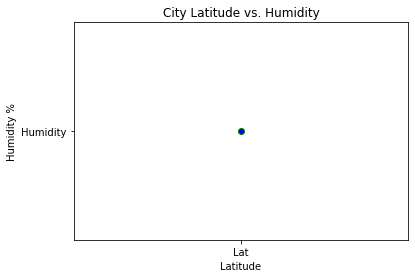

In [15]:
x_axis = clean_city_data['Lat']
y_axis = clean_city_data['Humidity']
plt.scatter('Lat', 'Humidity', marker="o", color='blue', edgecolor='green')
plt.xlabel('Latitude')
plt.ylabel('Humidity %')
plt.title("City Latitude vs. Humidity")
plt.show()

## Latitude vs. Cloudiness Plot

In [ ]:
x_axis = clean_city_data.loc[clean_city_data['Lat']
clouds = clean_city_data.loc[clean_city_data['Max Temp']
plt.scatter(x_axis, clouds, marker="o", color='blue', edgecolor='green')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness %')
plt.title("City Latitude vs. Cloudiness")
plt.show()

## Latitude vs. Wind Speed Plot

In [ ]:
x_axis = clean_city_data.loc[clean_city_data['Lat']
speed = clean_city_data.loc[clean_city_data['Wind Speed']
plt.scatter(x_axis, speed, marker="o", color='blue', edgecolor='green')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.title("City Latitude vs. Wind Speed")
plt.show()

## Linear Regression

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression